#1. Linear Regression 



In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.0+cu118'

In [2]:
# generate data
w = 0.7
b = 0.3
# create feature in Tensor
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = w*X + b

print(X[:2], y[:2])
print(f"shape of X is {X.shape}\n shape of y is {y.shape}")

tensor([[0.0000],
        [0.0200]]) tensor([[0.3000],
        [0.3140]])
shape of X is torch.Size([50, 1])
 shape of y is torch.Size([50, 1])


In [3]:
# split data
train_split = int(0.8 * len(y))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

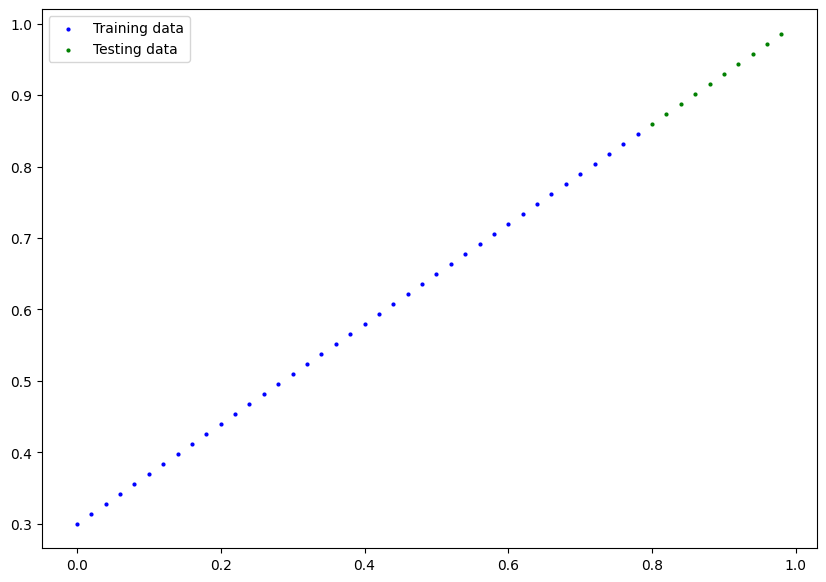

In [4]:
def plot_prediction(train_data =X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    prediction = None):
  # adjust figure size
  plt.figure(figsize=(10,7))

  # plot training data
  plt.scatter(train_data, train_label, c='b', s=4, label='Training data')

  # plot testing data
  plt.scatter(test_data, test_label, c='g', s=4, label='Testing data')

  # plot predicted data
  if prediction is not None:
    plt.scatter(test_data, prediction, c ='r', label='Predictions')
  plt.legend()
  plt.show()
plot_prediction()

In [8]:
# practice class
class Car:
  def __init__(self, color, mile):
    self.color = color
    self.mile = mile

  def description(self):
    return f" The {self.color} car has {self.mile} miles."
por = Car('Blue', 4000)
print(f'Color of por: {por.color}\n Mile of por: {por.mile}')
print(por.description())

Color of por: Blue
 Mile of por: 4000
 The Blue car has 4000 miles.


In [7]:
class LinearRegressionModel(nn.Module):
  
  def __init__(self):
    super().__init__()

    # random weights and bias, set type as a float, and update this value using gradient
    self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), 
                                 requires_grad = True)
    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float),
                              requires_grad = True)
  
  # Forward propagation 
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # y = w*X + b
    return self.weights * x + self.bias

In [10]:
torch.manual_seed(42)

# create a model
model_0 = LinearRegressionModel()

# show the parameter of the model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

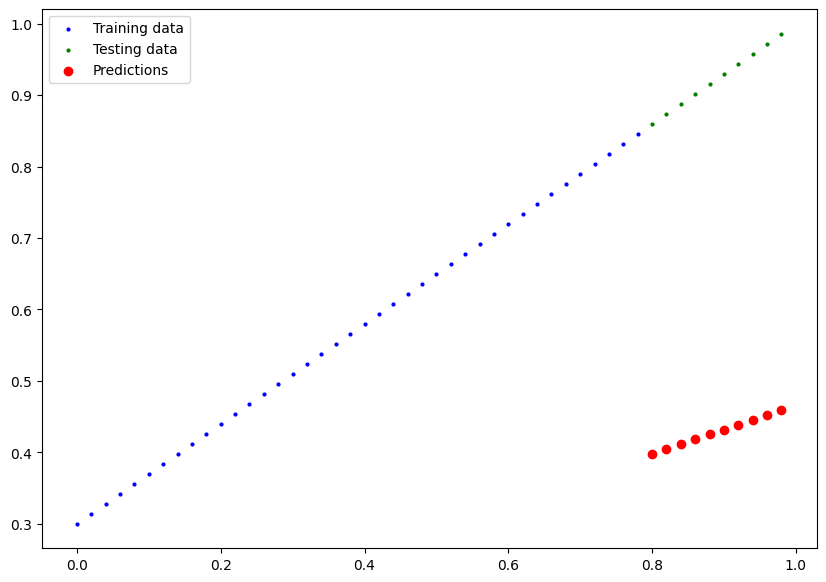

In [12]:
# we can use torch.no_grad() but torch.inference_mode() is newer and faster
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_prediction(prediction = y_preds)

In [13]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [14]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


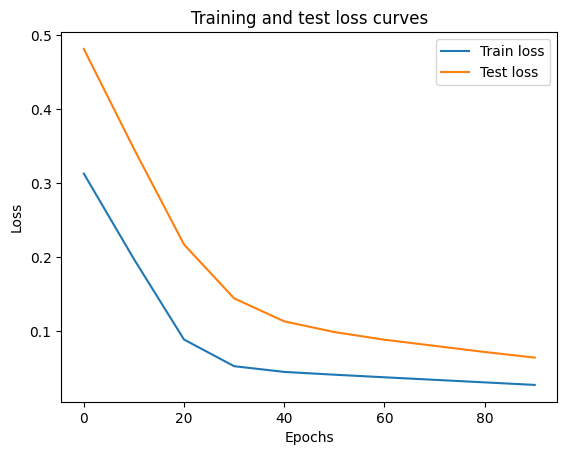

In [15]:
plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [17]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

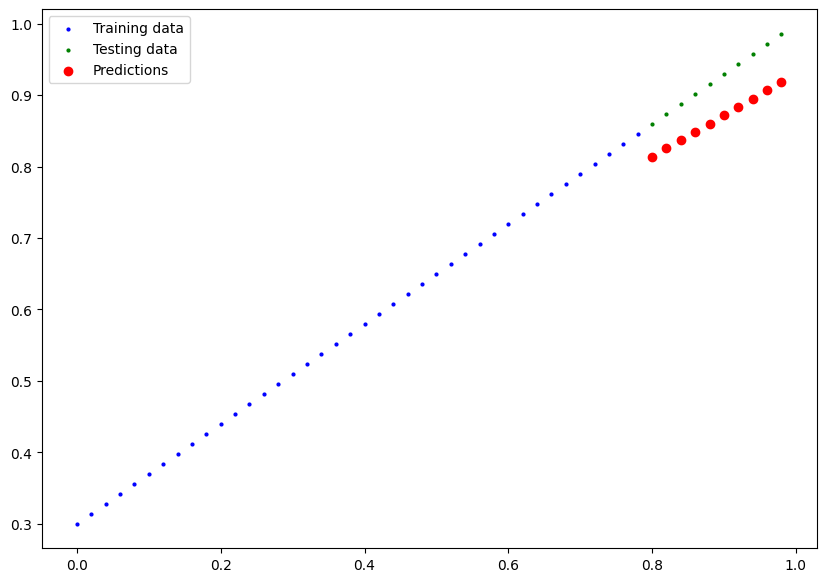

In [18]:
plot_prediction(prediction = y_preds)

In [19]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = '01.pth'
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01.pth


In [20]:
!ls -l models/01.pth

-rw-r--r-- 1 root root 915 Apr 11 04:46 models/01.pth


In [21]:
# load weight
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [22]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# summary

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.0+cu118'

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [26]:
# data generating process
w = 0.7
b = 0.3 
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = w*X+b

In [27]:
train_split = int(0.8*len(y))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

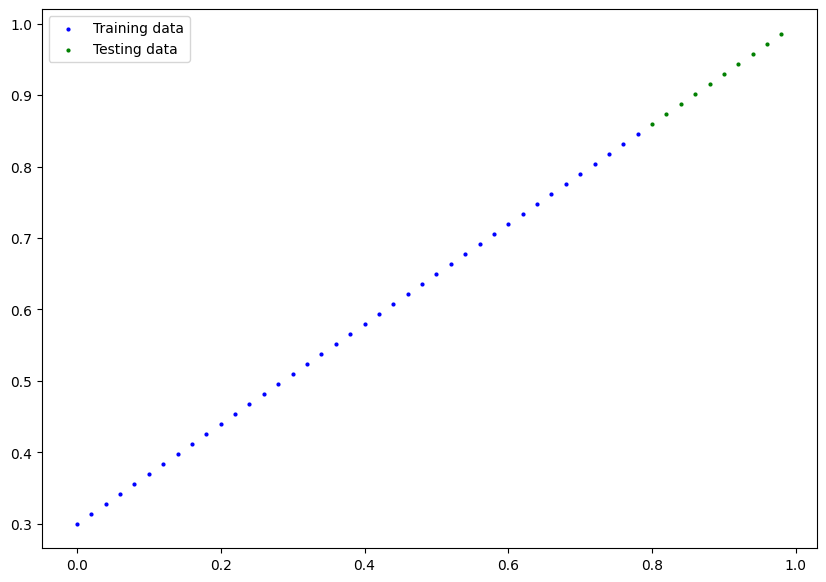

In [28]:
plot_prediction()

In [29]:
# Other way to create model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [30]:
next(model_1.parameters()).device

device(type='cpu')

In [31]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [32]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [33]:
X_train.shape

torch.Size([40, 1])

In [34]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


In [35]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [36]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = '012.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f = MODEL_SAVE_PATH)

In [37]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


**Change weight and bias of the true parameter**

In [56]:
# Data Generating Process
w = 0.3
b = 0.9
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = w*X + b
n = int(X.shape[0]*0.8)
X_train = X[:n,:]
X_test = X[n:,:]
y_train = y[:n,:]
y_test = y[n:,:]

In [57]:

class LinearRegressionModelPor(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,
                                    out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
torch.manual_seed(42)
model_2 = LinearRegressionModelPor()
model_2, model_2.state_dict()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [58]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_2.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_2.parameters()).device

device(type='cpu')

In [59]:
torch.manual_seed(42)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

epochs = 300

for i in range(epochs):
  model_2.train()

  y_pred = model_2(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test)

    test_loss = loss_fn(test_pred, y_test)
  if i % 50 == 0:
    print(f"Epoch: {i} | Train loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 0.12616769969463348 | Test loss: 0.33422544598579407
Epoch: 50 | Train loss: 0.068697988986969 | Test loss: 0.16397054493427277
Epoch: 100 | Train loss: 0.051440197974443436 | Test loss: 0.11986131966114044
Epoch: 150 | Train loss: 0.03427145257592201 | Test loss: 0.07918635755777359
Epoch: 200 | Train loss: 0.01710296794772148 | Test loss: 0.03919823095202446
Epoch: 250 | Train loss: 0.007012799382209778 | Test loss: 0.003249275730922818


In [60]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3064]])),
             ('linear_layer.bias', tensor([0.9045]))])

In [61]:
model_2.eval()
with torch.inference_mode():
  test_pred = model_2(X_test)

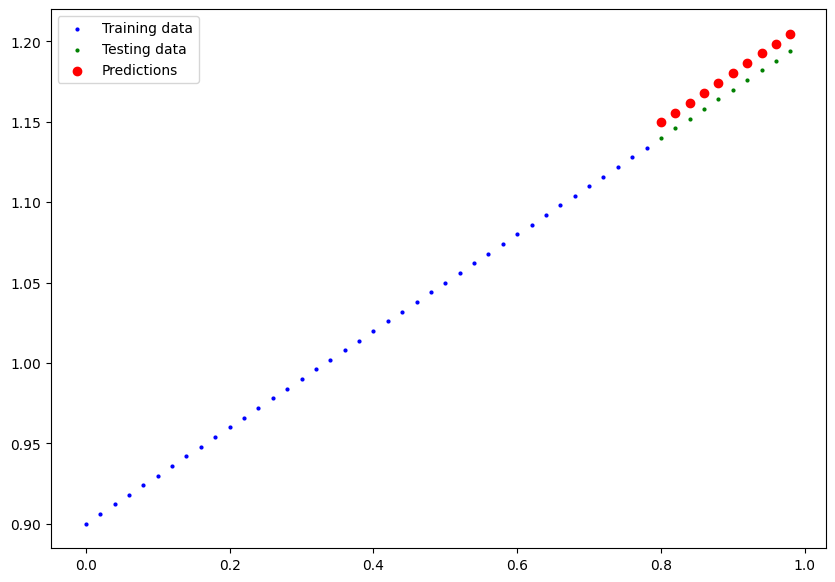

In [62]:
plot_prediction(train_data =X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    prediction = test_pred)